In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#deffining fitness funcation 
def fitness_function(x):
    f =  x[:,0]+x[:,1]-2*(x[:,0])**2-(x[:,1])**2+np.multiply(x[:,0],x[:,1])
    return(1/(1+f))

In [3]:
# Binnary genratore string 
def binary_genrator(l):
    l1 =[]
    l2 = [] 

    for i in range(l[0]):
        l1.append(random.randint(0, 1))
        
    for i in range(l[1]):
        l2.append(random.randint(0, 1))
    return(l1,l2)



In [4]:
#binnary to real
def binary_to_real(binary_array,limit):
    m_real = []
    d = binary_array.shape
   # print(d[0])
    for  i in binary_array:
        #print(i)
        q = d[1]-1
        sum = 0
        for j in i:
            #print(j)
            sum = sum+j*2**q
            q=q-1
        #print(sum)
        m_real.append(limit[0] + (limit[1]-limit[0])*sum/(2**d[1]-1)) 
    return(np.array(m_real))
#Return  value of  

In [5]:
#Roulet wheel 
def roulate_wheel(g,n,x1):
    x_v = decoding(g,n,x1)
    func = fitness_function(x_v)
    func_p = func/np.sum(func)
    f = g.shape
    lm = []
    j =0 
    for i in func_p:
    
        j = j +i
        lm.append(j)
    l_p =[]
    for i in range(f[0]):
        m_pp = random.uniform(0, 1)
        m =0
        for k in lm:
            if m_pp<k:
                l_p.append(m)
                break
            m = m+1
    g_x = np.empty((0,f[1]), int)
   
    for i  in l_p:
        g_x = np.append(g_x, np.array([g[i]]),axis =0) 
    #print(lm)  
    return(g_x) 


In [6]:
#cross_over opration
def cross_over(meating_pool,n_1):
    site = [4,7]
    f = meating_pool.shape
    m_pp = np.empty((0,f[1]), int)
    i =0
    f_l = list(range(0,f[0]))
    #print(len(f_l))
    while(i<f[0]):
        site[0] = int( random.uniform(1,n_1[1]))
        site[1] = int( random.uniform(site[0],n_1[1]))
        
        a = random.choice(f_l)
        f_l.remove(a)
        b = random.choice(f_l)
        f_l.remove(b)
        p_1 = meating_pool[a]
        p_2 = meating_pool[b]
        cr_p =  random.uniform(0, 1)
    
        if(cr_p < 0.9):
            for i in range(site[0],site[1]):
                o = p_1[i]
                p_1[i] = p_2[i]
                p_2[i] = o
        m_pp = np.append(m_pp,np.array([p_1]),axis =0)
        m_pp = np.append(m_pp,np.array([p_2]),axis =0) 
        a  = m_pp.shape
        i =a[0]

    return(m_pp)

In [7]:
#mutetion funcation
def mutetion(child_solu):
    p =0
    mu_p= 0.0001
    for  i in child_solu:
        q=0
        for j in i:
            
            mu_pp = random.uniform(0, 1)
            if(mu_pp<mu_p):
                if(j == 0):
                    child_solu[p][q] = 1
                else:
                    child_solu[p][q] = 0
            q=q+1
        p=p+1
    return(child_solu)

In [8]:
# real value to value under range
def decoding(mutted_pl,size,limit):
    f = mutted_pl.shape
    binary_x1 = np.delete(mutted_pl,np.s_[size[0]:], 1)
    binary_x2 = np.delete(mutted_pl,np.s_[:size[0]], 1)
    x_1 = binary_to_real(binary_x1,limit)
    x_2= binary_to_real(binary_x2,limit)
    x_vector = np.append(np.reshape(x_2, (f[0], 1)),np.reshape(x_2, (f[0], 1)),axis = 1)
    return(x_vector)

In [9]:
n =[20,20] # string length
s = 1000 # polulation size 
x1 = [0,0.5]  # range of variable
x2 = [0,0.5]

In [10]:
g_1 = np.empty((0,n[0]+n[1]), int)
d_x = np.empty((0,2), int)
#creating binnary population 
for i in range(s):
    b1,b2= binary_genrator(n)
    b = b1+b2
    g_1 = np.append(g_1, np.array([b]),axis =0) 
d_x = decoding(g_1,n,x1)
i =0
fun =[]
x1_mean = []
x2_mean = []
max_v = []
min_v = [] 
itr_count = []

#Genration loop

while(i< 100 or y <0.001 ):
    meting_pool = roulate_wheel(g_1,n,x1) # meating pool 
    chld_solu = cross_over(meting_pool,n)  # crossover 
    mutted_pool = mutetion(chld_solu)       #muatetion 
    x =  decoding(mutted_pool,n,x1)        # x1 ,x2 calculation
    funcation = fitness_function(x)       # fitness funcation vector 
    g_1 = mutted_pool                    # genration update 
    a = np.sum(funcation)/s              
    y = (1/a-1)
    min_v.append(1/np.max(funcation)-1)
    max_v.append(1/np.min(funcation)-1)
    b  = np.mean(x,axis = 0 ,keepdims = True)
    x1_mean.append(b[0][0])
    x2_mean.append(b[0][1])
    fun.append(y)
    itr_count.append(i)
    i = i+1
    
    
  

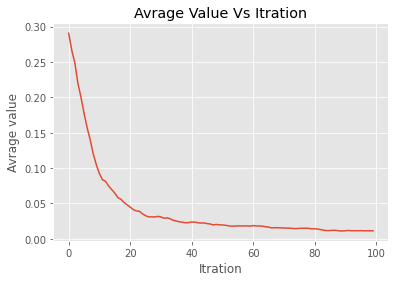

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.plot(itr_count,fun)
plt.title("Avrage Value Vs Itration")
plt.ylabel('Avrage value')
plt.xlabel('Itration')
plt.show()

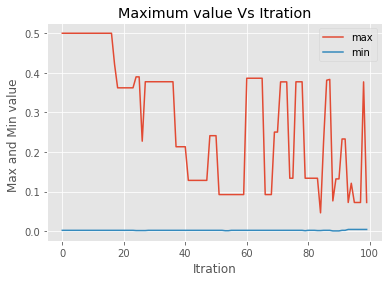

In [12]:
plt.plot(itr_count,max_v,label="max")
plt.plot(itr_count,min_v,label =  "min")
plt.title("Maximum value Vs Itration")
plt.ylabel('Max and Min value ')
plt.xlabel('Itration')
plt.legend()
plt.show()

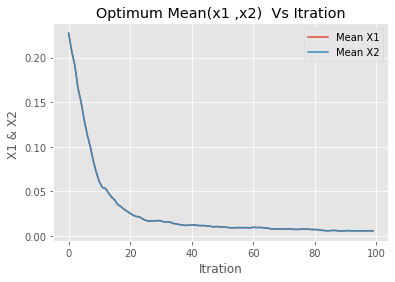

In [13]:
plt.plot(itr_count,x1_mean,label="Mean X1")
plt.plot(itr_count,x2_mean,label =  "Mean X2")
plt.title("Optimum Mean(x1 ,x2)  Vs Itration")
plt.ylabel('X1 & X2 ')
plt.xlabel('Itration')
plt.legend()
plt.show()

Text(0.5, 0, 'Itration')

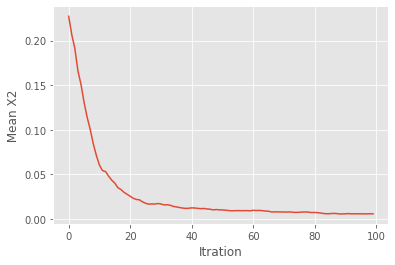

In [14]:
plt.plot(itr_count,x2_mean,label =  "Mean X2")
plt.ylabel(' Mean X2 ')
plt.xlabel('Itration')